In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'', # insert packages here e.g. r'\usepackage{mathrm}'
    "font.family": "serif",
    "font.serif": "cm",
    "font.size": 10,
    "legend.fontsize": 9
})

figwidth_latex_pt = 246.0
inches_per_pt = 1.0/72.27
golden = (np.sqrt(5)-1.0)/2.0
figwidth = figwidth_latex_pt*inches_per_pt
figheight = figwidth*golden
figsize = (figwidth, figheight)
figsize_mod = (figwidth, figheight*1.07)
figsize_map = (figwidth, figwidth)

### weak approximation

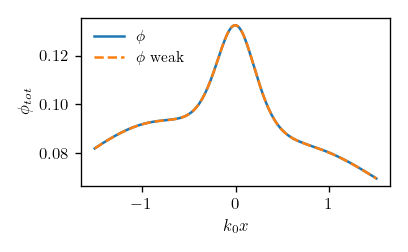

In [141]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_slice.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
phitot = file["phitot"]
weakphitot = file["weakphitot"]

plt.figure(figsize=figsize, dpi=120)
plt.plot(xx, np.abs(phitot[:, 10]), label="$\phi$")
plt.plot(xx, np.abs(weakphitot[:, 10]), '--', label="$\phi$ weak")
plt.xlabel("$k_0x$")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()
plt.show()

In [129]:
# list(np.concatenate(deviationavg).flat)

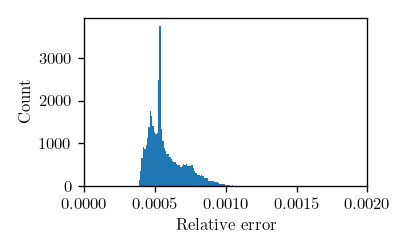

In [130]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins='auto')
plt.xlim((0, 0.002))
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

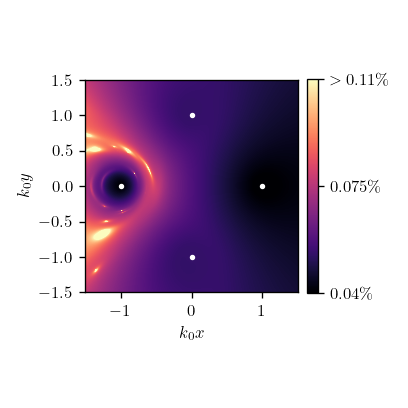

In [14]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_map.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    ax.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = ax.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0004,
           vmax=0.0011)
ax.ticklabel_format(scilimits=(0,0))
cbar = fig.colorbar(im, fraction=0.046, pad=0.04, ticks=[0.0004, 0.00075, 0.0011])
cbar.set_ticklabels(['$0.04\%$', '0.075\%', '$>0.11\%$'])
plt.xlabel("$k_0x$")
plt.ylabel("$k_0y$")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

### strong approximation

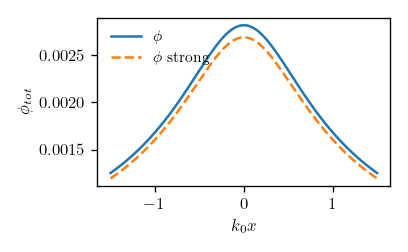

In [139]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_slice.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
phitot = file["phitot"]
strongphitot = file["strongphitot"]

plt.figure(figsize=figsize, dpi=120)
plt.plot(xx, np.abs(phitot[:, 50]), label="$\phi$")
plt.plot(xx, np.abs(strongphitot[:, 50]), '--', label="$\phi$ strong")
plt.xlabel("$k_0x$")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()
plt.show()

In [133]:
# list(np.concatenate(deviationavg).flat)

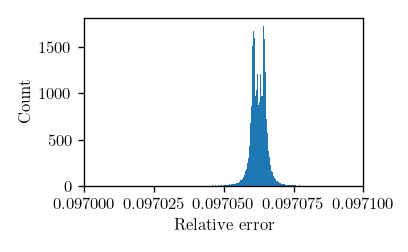

In [134]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins="auto")
plt.xlim(0.097, 0.0971)
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

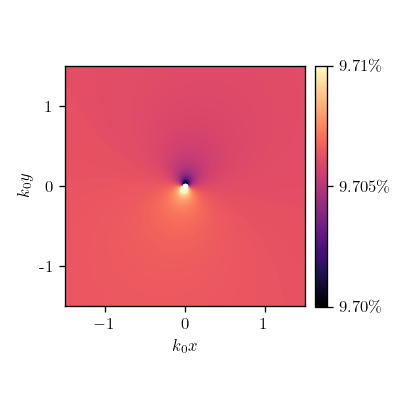

In [135]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_map.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    ax.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = ax.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0970,
           vmax=0.0971)
ax.ticklabel_format(scilimits=(0,0))
cbar = fig.colorbar(im, fraction=0.046, pad=0.04, ticks=[0.0970, 0.09705, 0.0971])
cbar.set_ticklabels(['9.70\%', '9.705\%', '9.71\%'])
plt.xlabel("$k_0x$")
plt.ylabel("$k_0y$")
plt.yticks([-1,0,1],['-1', '0', '1'])
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

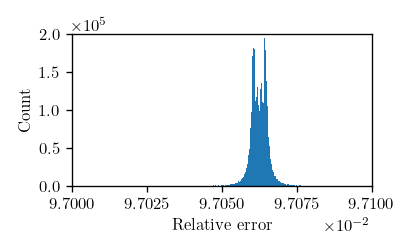

In [136]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/weak_strong_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
deviationavgweak = np.load("../data/weak_approx_map.npz")["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins="auto", density=True)
plt.hist(list(np.concatenate(deviationavgweak).flat), bins="auto", density=True)
ax.ticklabel_format(scilimits=(0,4))
plt.xlim(0.0970, 0.0971)
plt.ylim(0., 200000)
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

### alpha inequality

In [3]:
def lhs(alpha):
    return np.imag(alpha)
def rhs(alpha):
    return np.abs(alpha)**2 /4/np.pi

In [ ]:
alpha_span = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
ax.plot(alpha_span)

In [9]:
np.linspace(0,1,3) + np.linspace(0,1,3)*1j

array([0. +0.j , 0.5+0.5j, 1. +1.j ])

### Euclidean distance eigenvectors

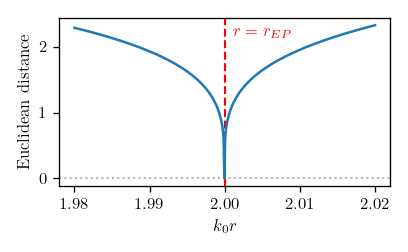

In [12]:
file = np.load("../data/eigs_n4.npz")
saveplot = "../data/euclideandistance.pdf"
rspan = file["rspan"]
eigvs = file["eigvs"]

distance = np.zeros(len(rspan))
for k in range(len(rspan)):
    for i in range(np.shape(eigvs)[1]):
        for j in range(i+1, np.shape(eigvs)[1]):
            distance[k] += la.norm(eigvs[k,:,i]-eigvs[k,:,j])

plt.figure(figsize=figsize, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(rspan[int(len(rspan)/2)], c='red', ls='--', lw=1.3)
plt.plot(rspan, distance, '-', c='C0')
plt.text(2.0011, 2.17, "$r=r_{EP}$", c='red')
plt.xlabel("$k_0r$")
plt.ylabel("Euclidean distance")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

Sol used:

sol = ComplexF64[-46.39937343108954 - 18.90058731508439im, 5.447492370746109 - 13.885801657331122im, 6.860469392719128 + 18.432874756207163im, -22.38728742001199 + 21.025300470722396im]

ftol = 1.0e-20
residual_norm = 2.4099548727191465e-17
FF(alphas) = ComplexF64[-8.218630134997239e-22 - 1.595332783391415e-21im, 6.776263578034403e-20 + 6.776263578034403e-20im, -2.6020852139652106e-18 - 1.734723475976807e-18im, -2.0816681711721685e-17 - 1.214306433183765e-17im]

### power output r and omega

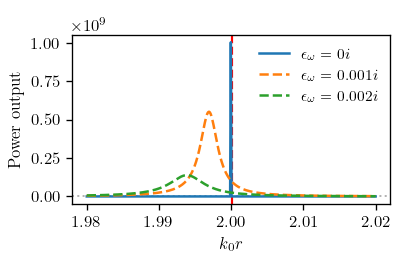

In [13]:
file = np.load("../data/poweroveromega_n4_imagomegashift.npz")
saveplot = "../data/poweroveromega_n4_imagomegashift.pdf"
rspan = file["rspan"]
omegaspan = file["omegaspan"]
Pout = file["Pout"]

plt.figure(figsize=figsize_mod, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(rspan[int(len(rspan)/2)], c='red', ls='--', lw=1.3)
# plt.plot(rspan, Pout[:, 0], '--', c='C0', label="$\epsilon_\omega=-0.002i$")
# plt.plot(rspan, Pout[:, 100], '--', c='C1', label="$\epsilon_\omega=-0.001i$")
plt.plot(rspan, 6e-26*Pout[:, 200], '-', c='C0', label="$\epsilon_\omega=0i$")
plt.plot(rspan, Pout[:, 300], '--', c='C1', label="$\epsilon_\omega=0.001i$")
plt.plot(rspan, Pout[:, 400], '--', c='C2', label="$\epsilon_\omega=0.002i$")
# plt.xlim(2-0.011, 2+0.011)
# plt.text(1.99, 0.93*1e9, "$r=r_{EP}$", c='black')
plt.xlabel("$k_0r$")
plt.ylabel("Power output")
plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

Sol used:

sol = ComplexF64[5.4477774206163145 - 13.885510026031486im, 6.860020877447687 + 18.4327250661243im, -22.387418450548374 + 21.02546310488728im, -46.39542165136222 - 18.899650335002345im]

ftol = 1.0e-20
residual_norm = 9.69739903612216e-19
FF(alphas) = ComplexF64[6.303469119388311e-22 - 1.7827228252993073e-21im, 4.0657581468206416e-20 + 2.710505431213761e-20im, -8.673617379884035e-19 + 4.336808689942018e-19im, 0.0 + 0.0im]

### active/passive alphas

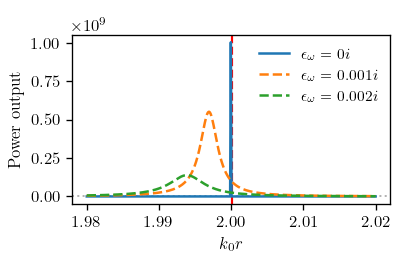

In [ ]:
file = np.load("../data/poweroveromega_n4_imagomegashift.npz")
saveplot = "../data/poweroveromega_n4_imagomegashift.pdf"
rspan = file["rspan"]
omegaspan = file["omegaspan"]
Pout = file["Pout"]

plt.figure(figsize=figsize_mod, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(rspan[int(len(rspan)/2)], c='red', ls='--', lw=1.3)
# plt.plot(rspan, Pout[:, 0], '--', c='C0', label="$\epsilon_\omega=-0.002i$")
# plt.plot(rspan, Pout[:, 100], '--', c='C1', label="$\epsilon_\omega=-0.001i$")
plt.plot(rspan, 6e-26*Pout[:, 200], '-', c='C0', label="$\epsilon_\omega=0i$")
plt.plot(rspan, Pout[:, 300], '--', c='C1', label="$\epsilon_\omega=0.001i$")
plt.plot(rspan, Pout[:, 400], '--', c='C2', label="$\epsilon_\omega=0.002i$")
# plt.xlim(2-0.011, 2+0.011)
# plt.text(1.99, 0.93*1e9, "$r=r_{EP}$", c='black')
plt.xlabel("$k_0r$")
plt.ylabel("Power output")
plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()